Guillaume Poirier-Morency et Gabriel Lemyre

Chaque modèle est présenté successivement, entraîné et finalement testés selon les meilleurs paramètres obtenus par le processus de validation.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_mldata
%matplotlib inline

In [85]:
mnist_data = fetch_mldata('mnist-original')
mnist_train_X, mnist_test_X, mnist_train_Y, mnist_test_Y = train_test_split(mnist_data['data'], mnist_data['target'])

# Classifieur de Bayes

In [86]:
from sklearn.naive_bayes import GaussianNB

In [89]:
gnb = GaussianNB()
cross_val_score(gnb, mnist_train_X, mnist_train_Y, scoring='accuracy', n_jobs=-1).mean()

0.55929549399318146

# Arbres de décision

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [105]:
dtc = DecisionTreeClassifier()
gs = GridSearchCV(dtc, param_grid={'max_depth': range(1, 20)}, scoring='accuracy', n_jobs=-1)
gs.fit(mnist_train_X, mnist_train_Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

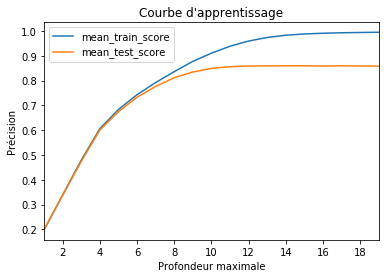

In [106]:
pd.DataFrame(gs.cv_results_)[['param_max_depth', 'mean_train_score', 'mean_test_score']].plot(x='param_max_depth')
plt.title('Courbe d\'apprentissage')
plt.xlabel('Profondeur maximale')
plt.ylabel('Précision')

# Arbres de décisions + classifieurs de Bayes

# Modèle boosté

# Perceptron multi-couches

In [46]:
from keras.models import Sequential
from keras.layers import Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import SGD

In [47]:
model = Sequential()
model.add(Dense(units=28*28, input_dim=28*28))
model.add(Dense(units=10))

In [48]:
model.compile(loss=categorical_crossentropy, optimizer=SGD(), metrics=['accuracy'])

In [49]:
model.predict(np.zeros(shape=(1, 784)))

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]], dtype=float32)

# Réseau de neurones convolutif

# Tests

Ici, on trouve le code pour les tests finaux qui ont été effectués à la toute fin, indépendament du processus de validation afin d'avoir la meilleure idée possible de la performance de généralisation de chaque modèle.